In [103]:
import mlgrad.pca as pca
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.inventory as inventory

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("data/animals.csv", sep=',')
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [105]:
X = np.log(df["body"].values)
Y = np.log(df["brain"].values)
Name = df["name"].values

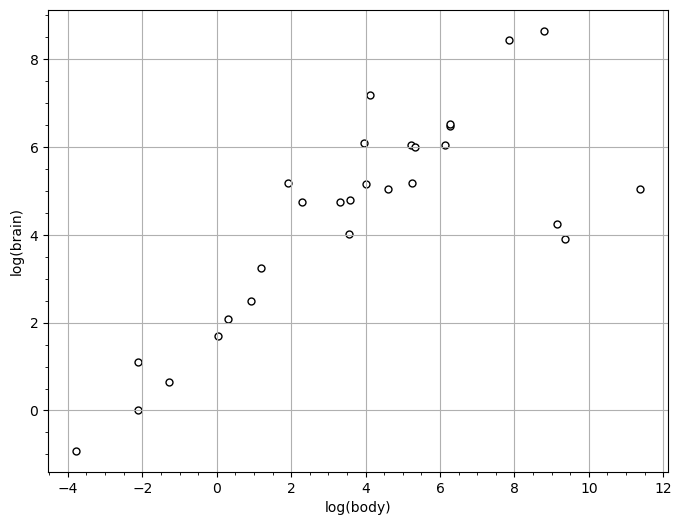

In [106]:
plt.figure(figsize=(8.0, 6.0))
plt.scatter(X, Y, s=25, c='w', edgecolors='k', linewidth=1.)
plt.minorticks_on()
plt.grid(1)
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.show()

In [107]:
XY = np.c_[X, Y]
print(len(XY))

28


In [108]:
c0 = pca.location(XY)
С0 = pca.scatter_matrix(XY - c0)
S0 = np.linalg.inv(С0)
print(c0)
print(S0)

[3.771 4.425]
[[ 0.186 -0.228]
 [-0.228  0.459]]


In [ ]:
def dist2(S, c, XY):
    XY_c = XY - c
    return np.array([(S@xy)@xy for xy in (XY-c)])

def rectangle_points(x0, x1, y0, y1):
    xr = np.linspace(x0, x1, 101)
    yr = np.linspace(y0, y1, 101)
    xx, yy = np.meshgrid(xr, yr)
    xy = np.c_[xx.flat, yy.flat]
    return xx, yy, xy
    
def eval_dists_prob(S, c):
    xx, yy, xy = rectangle_points(-5, 13, -1, 9)
    zz = dist2(S, c, xy)
    ch2 = 1 - stats.chi2.cdf(zz, 2)
    zz = zz.reshape(xx.shape)
    ch2 = ch2.reshape(xx.shape)
    return zz, ch2

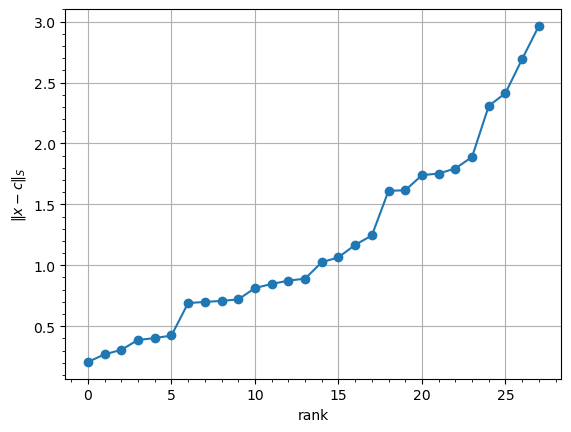

In [109]:
D0 = np.sqrt(dist2(S0, c0, XY))
plt.plot(sorted(D0), marker='o')
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

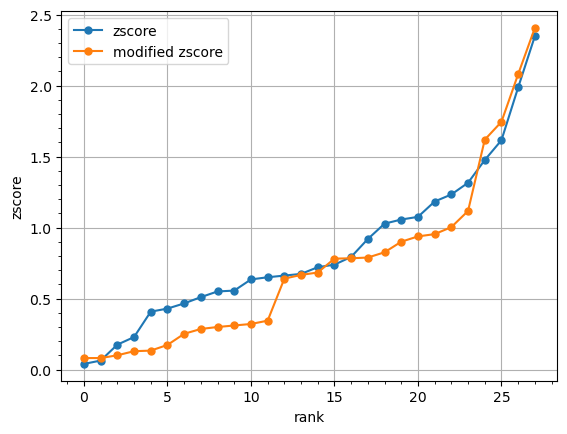

In [110]:
Z0 = inventory.zscore(D0)
Zm0 = inventory.modified_zscore(D0)
plt.plot(sorted(abs(Z0)), marker='o', markersize=5, label="zscore")
plt.plot(sorted(abs(Zm0)), marker='o', markersize=5, label="modified zscore")
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

In [113]:
zz, ch2 = eval_dists_prob(S0, c0)
D2 = dist2(S0, c0, XY)
CH2 = 1-stats.chi2.cdf(D2, 2)
XY_o = XY[CH2 < 0.06]
print(XY_o)

[[ 9.367  3.912]
 [ 9.148  4.248]
 [11.374  5.040]]


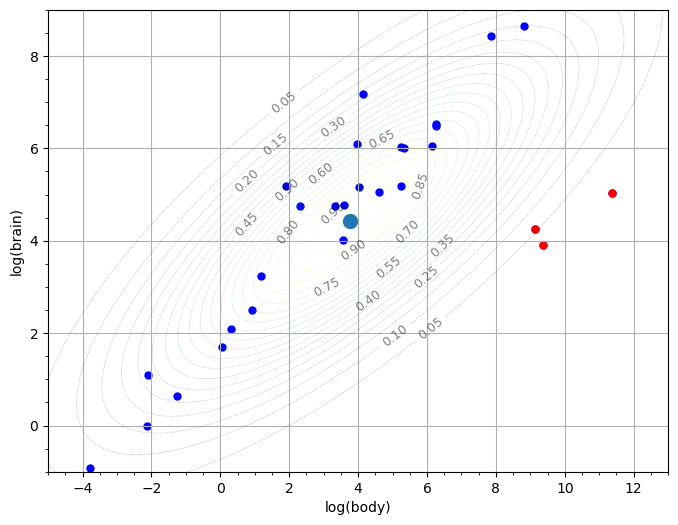

In [114]:
plt.figure(figsize=(8.0, 6.0))
plt.scatter(X, Y, s=25, c='blue', linewidth=1.)
plt.scatter(XY_o[:,0], XY_o[:,1], s=25, c='r', linewidth=1.)
plt.scatter([c0[0]], [c0[1]], s=100)
# ct = plt.contour(xx, yy, zz, levels=np.arange(0,20,0.5), linewidths=0.5, linestyles=':', alpha=0.5)
ct = plt.contour(xx, yy, ch2, levels=np.arange(0, 1 ,0.05), linewidths=0.5, linestyles=':', alpha=0.5)
plt.clabel(ct, fontsize=9, colors='k')
plt.minorticks_on()
plt.grid(1)
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.show()

In [115]:
maf = af.averaging_function("WM", 
                            funcs.QuantileFunc(0.84, funcs.SoftAbs_Sqrt(0.001)))
# c1 = pca.robust_location(XY, maf)
c1, S1 = pca.robust_location_scatter(XY, maf)
# S1 = S1 / np.linalg.det(S1) ** (1/2)
print(c1)
print(S1)

[2.536 3.987]
[[ 1.417 -1.696]
 [-1.696  2.171]]


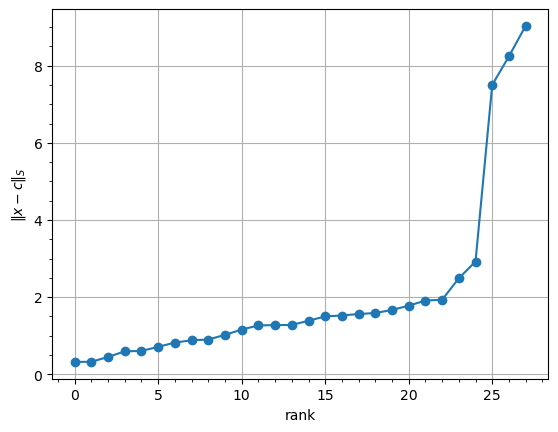

In [116]:
D1 = np.sqrt(dist2(S1, c1, XY))
plt.plot(sorted(D1), marker='o')
plt.ylabel(r'$\|x-c\|_S$')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.show()

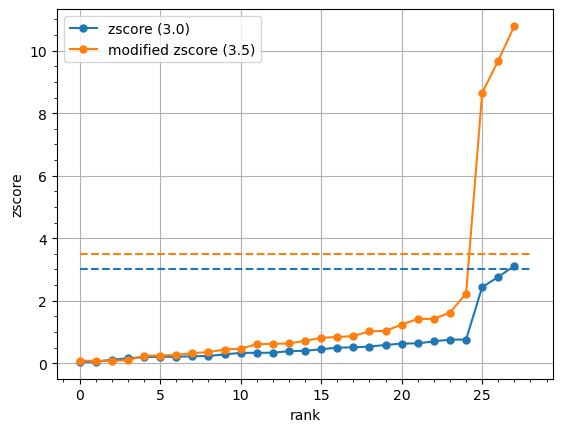

In [117]:
Z1 = inventory.zscore(D1)
Zm1 = inventory.modified_zscore(D1)
ls1 = plt.plot(sorted(abs(Z1)), marker='o', markersize=5, label="zscore (3.0)")
ls1m = plt.plot(sorted(abs(Zm1)), marker='o', markersize=5, label="modified zscore (3.5)")
plt.hlines(3.0, 0, len(XY), linestyle='--', color=ls1[0].get_color())
plt.hlines(3.5, 0, len(XY), linestyle='--', color=ls1m[0].get_color())
plt.ylabel(r'zscore')
plt.xlabel('rank')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()

In [123]:
zz, ch2 = eval_dists_prob(S1, c1)
D2 = dist2(S1, c1, XY)
CH2 = 1-stats.chi2.cdf(D2, 2)
XY_o = XY[CH2 < 0.05]
print(XY_o)
Name_o = Name[CH2 < 0.05]

[[ 9.367  3.912]
 [ 4.127  7.185]
 [ 9.148  4.248]
 [ 1.917  5.187]
 [11.374  5.040]]


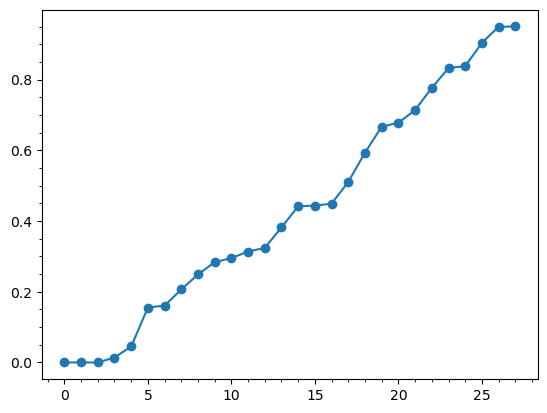

In [124]:
plt.plot(sorted(CH2), marker='o')
plt.minorticks_on()
plt.show()

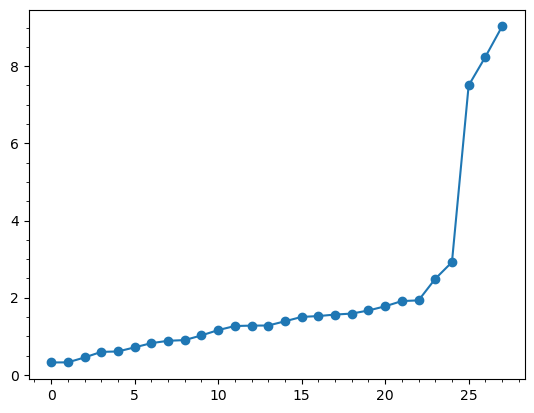

In [120]:
plt.plot(sorted(np.sqrt(D2)), marker='o')
plt.minorticks_on()
plt.show()

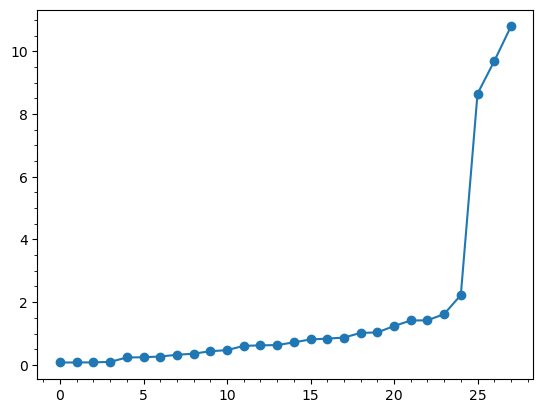

In [121]:
plt.plot(sorted(abs(inventory.modified_zscore(np.sqrt(D2)))), marker='o')
plt.minorticks_on()
plt.show()

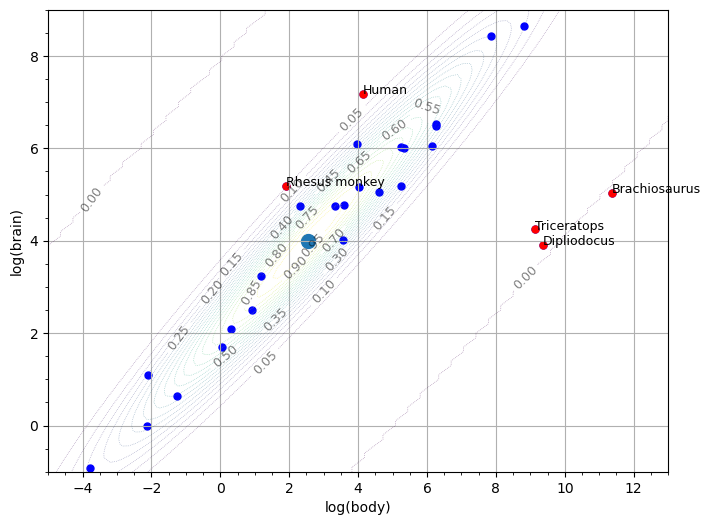

In [125]:
plt.figure(figsize=(8.0, 6.0))
plt.scatter(X, Y, s=25, c='blue', linewidth=1.)
plt.scatter(XY_o[:,0], XY_o[:,1], s=25, c='r', linewidth=1.)
for xy,nm in zip(XY_o,Name_o):
    plt.text(xy[0], xy[1], nm, fontsize=9)
plt.scatter([c1[0]], [c1[1]], s=100)
# ct = plt.contour(xx, yy, zz, levels=np.arange(0,20,0.5), linewidths=0.5, linestyles=':', alpha=0.5)
ct = plt.contour(xx, yy, ch2, levels=np.arange(0, 1 ,0.05), linewidths=0.5, linestyles=':', alpha=0.5)
plt.clabel(ct, fontsize=9, colors='k')
plt.minorticks_on()
plt.grid(1)
plt.xlabel("log(body)")
plt.ylabel("log(brain)")
plt.show()